<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Общий-вывод:" data-toc-modified-id="Общий-вывод:-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод:</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)



**Описание данных**


**Признаки:**

RowNumber — индекс строки в данных

CustomerId — уникальный идентификатор клиента

Surname — фамилия

CreditScore — кредитный рейтинг

Geography — страна проживания

Gender — пол

Age — возраст

Tenure — сколько лет человек является клиентом банка

Balance — баланс на счёте

NumOfProducts — количество продуктов банка, используемых клиентом

HasCrCard — наличие кредитной карты

IsActiveMember — активность клиента

EstimatedSalary — предполагаемая зарплата

**Целевой признак:**

Exited — факт ухода клиента

## Подготовка данных

Импортируем необходимые библиотеки, модели, метрики и другое, что пригодится в исследовании:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.dummy import DummyClassifier


from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, roc_auc_score, roc_curve
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV


import warnings
warnings.filterwarnings('ignore')

<div class="alert alert-block alert-success">
<b>Успех:</b> Импорты на месте
</div>


Изучим данные на наличие дубликатов, пропусков, правильность отображения:

In [2]:
data = pd.read_csv('/datasets/Churn.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [3]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,9091.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,4.997690,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.894723,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,2.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [4]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


In [5]:
data.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5.0,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10.0,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7.0,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3.0,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,NaN,130142.79,1,1,0,38190.78,0


In [6]:
data.duplicated().sum()

0

In [7]:
data.isna().sum()

RowNumber            0
CustomerId           0
Surname              0
CreditScore          0
Geography            0
Gender               0
Age                  0
Tenure             909
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited               0
dtype: int64

Дубликаты отсутствуют, подозрительные значения и выбросы не замечены. 

Необходимо изучить пропуски в столбце tenure (9% пропущено), убрать столбцы RowNumber,	CustomerId,	Surname (нет полезной информации для будущих моделей).

Также привести название столбцов к змеиному регистру.

Начнем со столбцов:

In [8]:
import re
data.columns = [re.sub(r'(?<!^)(?=[A-Z])', '_', i).lower()for i in data.columns]

Удаляем колонки:

In [9]:
data.drop(columns=['row_number', 'customer_id', 'surname'], inplace=True)
data.columns


Index(['credit_score', 'geography', 'gender', 'age', 'tenure', 'balance',
       'num_of_products', 'has_cr_card', 'is_active_member',
       'estimated_salary', 'exited'],
      dtype='object')

<div class="alert alert-block alert-success">
<b>Успех:</b> Удалить неинформативные признаки - хорошее решение. 
</div>


Рассмотрим столбец tenure. Вполне возможно, что если не указано сколько лет человек является клиентом, то клиент новый, т.е. меньше года. Поэтому можно заменить пропуски на 0.

In [10]:
data['tenure'] = data['tenure'].fillna(0)

Рассмотрим также целевой признак:

In [11]:
data['exited'].value_counts(normalize=True)

0    0.7963
1    0.2037
Name: exited, dtype: float64

<div class="alert alert-block alert-success">
<b>Успех:</b> Дисбаланс обнаружен
</div>


Несбалансирован целевой категориальный признак, учтем в исследовании. Создадим датафрейм по методу прямого кодирования с защитой от дамми-ловушки:

In [12]:
ohe_data = pd.get_dummies(data, drop_first=True)
ohe_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit_score       10000 non-null  int64  
 1   age                10000 non-null  int64  
 2   tenure             10000 non-null  float64
 3   balance            10000 non-null  float64
 4   num_of_products    10000 non-null  int64  
 5   has_cr_card        10000 non-null  int64  
 6   is_active_member   10000 non-null  int64  
 7   estimated_salary   10000 non-null  float64
 8   exited             10000 non-null  int64  
 9   geography_Germany  10000 non-null  uint8  
 10  geography_Spain    10000 non-null  uint8  
 11  gender_Male        10000 non-null  uint8  
dtypes: float64(3), int64(6), uint8(3)
memory usage: 732.5 KB


<div class="alert alert-block alert-success">
<b>Успех:</b>  OHE - хороший выбор, применен корректно. Но лучше использовать инструмент OneHotEncoder от sklearn
</div>


**Вывод**:

1. Изучены данные, названия столбцов преведены к змеиному регистру;
2. Удалены столбцы, которые не повлияют на дальнейшее исследование;
3. Выяснено, что данные несбалансированы (79,6% клиентов осталось, остальные - ушли из банка);
4. Пропуски были расположены в столбце tenure. Было предположено, что пропуски - это клиенты на обслуживании банка меньше года, поэтому Nan заменили на 0.



<div class="alert alert-block alert-success">
<b>Успех:</b>  В целом неплохая предобработка, идем дальше.
</div>


## Исследование задачи

Для исследования будут использованы следующие модели:
1. Логистическая регрессия;
2. Случайный лес;
3. Решающее дерево.

Разобьем данные по принципу 60/20/20:

In [13]:
target = ohe_data['exited']
features = ohe_data.drop('exited', axis=1)

features_train, features_valid, target_train, target_valid = train_test_split(features, target, test_size=0.4, 
                                                                              random_state=12345)
features_valid, features_test, target_valid, target_test = train_test_split(features_valid, target_valid, test_size=0.5, 
                                                                              random_state=12345)


<div class="alert alert-block alert-success">
<b>Успех:</b> С разбиением все ок
</div>


Выше отметили, что существует дисбаланс данных в целевом признаке. Изучим сначала модели без исправления дисбаланса.

Начнем с **"решающего дерева":**

In [14]:
%%time
best_depth = 0
best_f1 = 0
best_model = None

for depth in range(1, 30):
    model = DecisionTreeClassifier(random_state=12345, max_depth=depth)
    model.fit(features_train, target_train)
    predicted_valid = model.predict(features_valid)
    f1 = f1_score(target_valid, predicted_valid)
    
    if f1 > best_f1:
        best_f1 = f1
        best_depth = depth
print('Лучшая глубина дерева:', best_depth,
      '   Лучший F1-score:', best_f1
     )

Лучшая глубина дерева: 9    Лучший F1-score: 0.5786516853932585
CPU times: user 864 ms, sys: 7.36 ms, total: 871 ms
Wall time: 870 ms


Также можно рассмотреть другие гиперпараметры, оставим лучшую глубину 9. Заменим гиперпараметр gini на entropy в criterion, а splitter вместо гиперпараметра best поставим random:

In [15]:
model = DecisionTreeClassifier(random_state=12345, max_depth=9,criterion='entropy')
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)
f1 = f1_score(target_valid, predicted_valid)
print('F1-score:', f1)

F1-score: 0.5443786982248522


In [16]:
model = DecisionTreeClassifier(random_state=12345, max_depth=9, splitter='random')
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)
f1 = f1_score(target_valid, predicted_valid)
print('Лучший F1-score:', best_f1)

Лучший F1-score: 0.5786516853932585


In [17]:
model = DecisionTreeClassifier(random_state=12345, max_depth=9,criterion='entropy', splitter='random')
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)
f1 = f1_score(target_valid, predicted_valid)
print('F1-score:', f1)

F1-score: 0.5306748466257668


Гиперпараметр random показывает себя хуже, чем best; gini вместе с best - лучше, чем entropy и random.

**"Случайный лес":**

In [18]:
%%time
best_est = 0
best_f1 = 0
best_model = None

for est in range(1, 50):
    model = RandomForestClassifier(random_state=12345, n_estimators= est)
    model.fit(features_train, target_train)
    predicted_valid = model.predict(features_valid)
    f1 = f1_score(target_valid, predicted_valid)
    
    if f1 > best_f1:
        best_f1 = f1
        best_est = est
print('Лучшее количество деревьев:', best_est,
      '   Лучший F1-score:', best_f1
     )

Лучшее количество деревьев: 41    Лучший F1-score: 0.5950653120464442
CPU times: user 10.3 s, sys: 48.5 ms, total: 10.4 s
Wall time: 10.4 s


Также посмотрим "Случайный лес" с такими гиперпараметрами, как bootstrap=False и warm_start=True:

In [19]:
model = RandomForestClassifier(random_state=12345, n_estimators=41, bootstrap=False)
model.fit(features_train, target_train)
valid_predictions = model.predict(features_valid)
predicted_valid = model.predict(features_valid)
f1 = f1_score(target_valid, predicted_valid)
print('F1-score:', f1)

F1-score: 0.5829725829725829


In [20]:
model = RandomForestClassifier(random_state=12345, n_estimators=41, warm_start=True)
model.fit(features_train, target_train)
valid_predictions = model.predict(features_valid)
predicted_valid = model.predict(features_valid)
f1 = f1_score(target_valid, predicted_valid)
print('F1-score:', f1)

F1-score: 0.5950653120464442


In [21]:
model = RandomForestClassifier(random_state=12345, n_estimators=41, bootstrap=False, warm_start=True)
model.fit(features_train, target_train)
valid_predictions = model.predict(features_valid)
predicted_valid = model.predict(features_valid)
f1 = f1_score(target_valid, predicted_valid)
print('F1-score:', f1)

F1-score: 0.5829725829725829


**"Логическая регрессия:"**

In [22]:
%%time
best_max_iteration = 0
best_f1 = 0
best_model = None

for max_it in range(1, 30):
    model = LogisticRegression(random_state=12345, max_iter=max_it, solver='liblinear')
    model.fit(features_train, target_train)
    predicted_valid = model.predict(features_valid)
    f1 = f1_score(target_valid, predicted_valid)
    
    if f1 > best_f1:
        best_f1 = f1
        best_max_iteration = max_it
print('Лучшее количество итерраций:', best_max_iteration,
      '   Лучший F1-score:', best_f1
     )

Лучшее количество итерраций: 15    Лучший F1-score: 0.08713692946058092
CPU times: user 2.37 s, sys: 2.39 s, total: 4.76 s
Wall time: 4.75 s


Лучший F1-score (равен 0.6) получен у модели "Случайного леса" при гиперпараметре n_estimators = 41; худший у логической регрессии. Необходимо также просмотреть accuracy, precision и recall:

In [23]:
%%time

model = DecisionTreeClassifier(random_state=12345, max_depth=9)
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)
print('Решающее дерево')
print('Качество', accuracy_score(target_valid, predicted_valid))
print('Precision', precision_score(target_valid, predicted_valid))
print('Recall', recall_score(target_valid, predicted_valid))
print('F1-score', f1_score(target_valid, predicted_valid))


Решающее дерево
Качество 0.85
Precision 0.7006802721088435
Recall 0.49282296650717705
F1-score 0.5786516853932585
CPU times: user 67.7 ms, sys: 51.9 ms, total: 120 ms
Wall time: 126 ms


In [24]:
%%time
model = RandomForestClassifier(random_state=12345, n_estimators=41)
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)
print('Случайный лес')
print('Качество', accuracy_score(target_valid, predicted_valid))
print('Precision', precision_score(target_valid, predicted_valid))
print('Recall', recall_score(target_valid, predicted_valid))
print('F1-score', f1_score(target_valid, predicted_valid))

Случайный лес
Качество 0.8605
Precision 0.7564575645756457
Recall 0.4904306220095694
F1-score 0.5950653120464442
CPU times: user 354 ms, sys: 204 µs, total: 355 ms
Wall time: 369 ms


In [25]:
%%time
model = LogisticRegression(random_state=12345, solver='liblinear')
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)
print('Логистическая регрессия')
print('Качество', accuracy_score(target_valid, predicted_valid))
print('Precision', precision_score(target_valid, predicted_valid))
print('Recall', recall_score(target_valid, predicted_valid))
print('F1-score', f1_score(target_valid, predicted_valid))

Логистическая регрессия
Качество 0.7815
Precision 0.3389830508474576
Recall 0.04784688995215311
F1-score 0.08385744234800838
CPU times: user 58.2 ms, sys: 33.7 ms, total: 91.9 ms
Wall time: 91.2 ms


Построим ROC-кривую для каждой модели. И выведем метрику AUC-ROC:

AUC-ROC Решаюшего дерева: 0.7899719632952051
AUC-ROC Случайного леса: 0.8377258512330706
AUC-ROC Логической регрессии: 0.6727584246214894


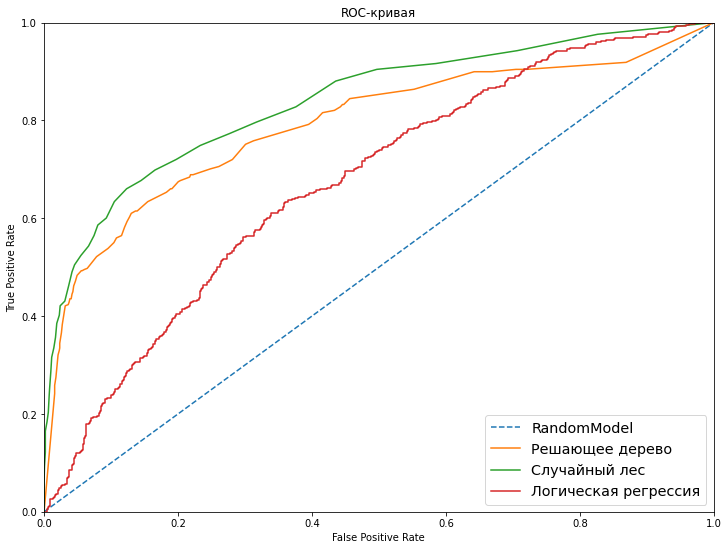

In [26]:
plt.figure(figsize=[12,9])

plt.plot([0, 1], [0, 1], linestyle='--', label='RandomModel')


model = DecisionTreeClassifier(random_state=12345, max_depth=9)
model.fit(features_train, target_train)
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print('AUC-ROC Решаюшего дерева:',auc_roc)
plt.plot(fpr, tpr, label='Решающее дерево')

model = RandomForestClassifier(random_state=12345, n_estimators=41)
model.fit(features_train, target_train)
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print('AUC-ROC Случайного леса:',auc_roc)
plt.plot(fpr, tpr, label='Случайный лес')

model = LogisticRegression(random_state=12345, solver='liblinear')
model.fit(features_train, target_train)
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print('AUC-ROC Логической регрессии:',auc_roc)
plt.plot(fpr, tpr, label='Логическая регрессия')



plt.xlim([0,1])
plt.ylim([0,1])

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

plt.legend(loc='lower right', fontsize='x-large')

plt.title("ROC-кривая")
plt.show()

**Вывод:**
1. Данные разбили на обучающую, тестовую и валидационную выборки в соотношении 60:20:20, целевой признак - категортиальный;
2. В данных присутсвует дисбаланс в отношении 1:4. Сильнее всего страдает от дисбаланса модель логической регрессии;
2. Лучшие показатели у случайного леса при n_estimators = 41: качество 0.86, precision 0.76, recall 0.49, f1 0.595, а также AUC-ROC= 0.84;
3. Все модели имеют recall ниже, чем percision, что, возможно, также влияет на F1-меру.

<div class="alert alert-block alert-success">
<b>Успех:</b> Шаг проделан хорошо, идем дальше.
</div>

## Борьба с дисбалансом

Для борьбы с дисбалансом выполним сравнение моделей:
1. С взвешенными классами;
2. С уменьшенной выборкой;
3. С увеличенной выборкой;

Изучим возможности моделей по взвешиванию классов:

In [27]:
%%time

model = DecisionTreeClassifier(random_state=12345, max_depth=9, class_weight='balanced')
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)
print('Решающее дерево')
print('Качество', accuracy_score(target_valid, predicted_valid))
print('Precision', precision_score(target_valid, predicted_valid))
print('Recall', recall_score(target_valid, predicted_valid))
print('F1', f1_score(target_valid, predicted_valid))


Решающее дерево
Качество 0.7625
Precision 0.4525790349417637
Recall 0.6507177033492823
F1 0.5338567222767419
CPU times: user 45.1 ms, sys: 342 µs, total: 45.5 ms
Wall time: 51.2 ms


In [28]:
%%time
model = RandomForestClassifier(random_state=12345, n_estimators=41, max_depth=12, class_weight='balanced')
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)
print('Случайный лес')
print('Качество', accuracy_score(target_valid, predicted_valid))
print('Precision', precision_score(target_valid, predicted_valid))
print('Recall', recall_score(target_valid, predicted_valid))
print('F1', f1_score(target_valid, predicted_valid))

Случайный лес
Качество 0.853
Precision 0.6834319526627219
Recall 0.5526315789473685
F1 0.6111111111111113
CPU times: user 354 ms, sys: 4.58 ms, total: 358 ms
Wall time: 363 ms


In [29]:
%%time
model = LogisticRegression(random_state=12345, solver='liblinear', class_weight='balanced')
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)
print('Логистическая регрессия')
print('Качество', accuracy_score(target_valid, predicted_valid))
print('Precision', precision_score(target_valid, predicted_valid))
print('Recall', recall_score(target_valid, predicted_valid))
print('F1', f1_score(target_valid, predicted_valid))

Логистическая регрессия
Качество 0.6585
Precision 0.33978234582829503
Recall 0.6722488038277512
F1 0.4514056224899599
CPU times: user 99.1 ms, sys: 93.2 ms, total: 192 ms
Wall time: 133 ms


F1-мера выросла у логической регрессии, а у дерева решений и случайного леса - упала. Также уменьшились у последних показатели precision, но увеличились показатели recall.

Исследуем способ уменьшения значений класса 0 и посмотрим их на модели:

In [30]:
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])
    
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345)
    
    return features_downsampled, target_downsampled

features_downsampled, target_downsampled = downsample(features_train, target_train, 0.25)

print(target_downsampled.value_counts())

0    1201
1    1196
Name: exited, dtype: int64


In [31]:
%%time

model = DecisionTreeClassifier(random_state=12345, max_depth=9, class_weight='balanced')
model.fit(features_downsampled, target_downsampled)
predicted_valid = model.predict(features_valid)
print('Решающее дерево')
print('Качество', accuracy_score(target_valid, predicted_valid))
print('Precision', precision_score(target_valid, predicted_valid))
print('Recall', recall_score(target_valid, predicted_valid))
print('F1', f1_score(target_valid, predicted_valid))
print()

model = RandomForestClassifier(random_state=12345, n_estimators=41, max_depth=12, class_weight='balanced')
model.fit(features_downsampled, target_downsampled)
predicted_valid = model.predict(features_valid)
print('Случайный лес')
print('Качество', accuracy_score(target_valid, predicted_valid))
print('Precision', precision_score(target_valid, predicted_valid))
print('Recall', recall_score(target_valid, predicted_valid))
print('F1', f1_score(target_valid, predicted_valid))
print()

model = LogisticRegression(random_state=12345, solver='liblinear', class_weight='balanced')
model.fit(features_downsampled, target_downsampled)
predicted_valid = model.predict(features_valid)
print('Логистическая регрессия')
print('Качество', accuracy_score(target_valid, predicted_valid))
print('Precision', precision_score(target_valid, predicted_valid))
print('Recall', recall_score(target_valid, predicted_valid))
print('F1', f1_score(target_valid, predicted_valid))

Решающее дерево
Качество 0.7365
Precision 0.42158273381294964
Recall 0.7009569377990431
F1 0.5265049415992812

Случайный лес
Качество 0.784
Precision 0.48919753086419754
Recall 0.7583732057416268
F1 0.5947467166979362

Логистическая регрессия
Качество 0.6595
Precision 0.3413751507840772
Recall 0.6770334928229665
F1 0.45388933440256624
CPU times: user 253 ms, sys: 40.1 ms, total: 293 ms
Wall time: 255 ms


Лучшие показатели у решающего дерева по сравнению с другими моделями. Показатели логической регрессии увеличились.

Также посмотри на увеличение класса 1:

In [32]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled

features_upsampled, target_upsampled = upsample(features_train, target_train, 4)

print(target_upsampled.value_counts())

0    4804
1    4784
Name: exited, dtype: int64


In [33]:
%%time

model = DecisionTreeClassifier(random_state=12345, max_depth=9, class_weight='balanced')
model.fit(features_downsampled, target_downsampled)
predicted_valid = model.predict(features_valid)
print('Решающее дерево')
print('Качество', accuracy_score(target_valid, predicted_valid))
print('Precision', precision_score(target_valid, predicted_valid))
print('Recall', recall_score(target_valid, predicted_valid))
print('F1', f1_score(target_valid, predicted_valid))
print()

model = RandomForestClassifier(random_state=12345, n_estimators=41, max_depth=12, class_weight='balanced')
model.fit(features_downsampled, target_downsampled)
predicted_valid = model.predict(features_valid)
print('Случайный лес')
print('Качество', accuracy_score(target_valid, predicted_valid))
print('Precision', precision_score(target_valid, predicted_valid))
print('Recall', recall_score(target_valid, predicted_valid))
print('F1', f1_score(target_valid, predicted_valid))
print()

model = LogisticRegression(random_state=12345, solver='liblinear', class_weight='balanced')
model.fit(features_downsampled, target_downsampled)
predicted_valid = model.predict(features_valid)
print('Логистическая регрессия')
print('Качество', accuracy_score(target_valid, predicted_valid))
print('Precision', precision_score(target_valid, predicted_valid))
print('Recall', recall_score(target_valid, predicted_valid))
print('F1', f1_score(target_valid, predicted_valid))

Решающее дерево
Качество 0.7365
Precision 0.42158273381294964
Recall 0.7009569377990431
F1 0.5265049415992812

Случайный лес
Качество 0.784
Precision 0.48919753086419754
Recall 0.7583732057416268
F1 0.5947467166979362

Логистическая регрессия
Качество 0.6595
Precision 0.3413751507840772
Recall 0.6770334928229665
F1 0.45388933440256624
CPU times: user 268 ms, sys: 25.7 ms, total: 294 ms
Wall time: 276 ms


Лучшей моделью оказался случайный лес, показатели улучшились по сравнению с дисбалансными даннымию Также посмотрим на ROC-кривую и AUC-ROC после изменений:

AUC-ROC Решаюшего дерева: 0.7601818302796411
AUC-ROC Случайного леса: 0.8450662053363498
AUC-ROC Логической регрессии: 0.719318408652363


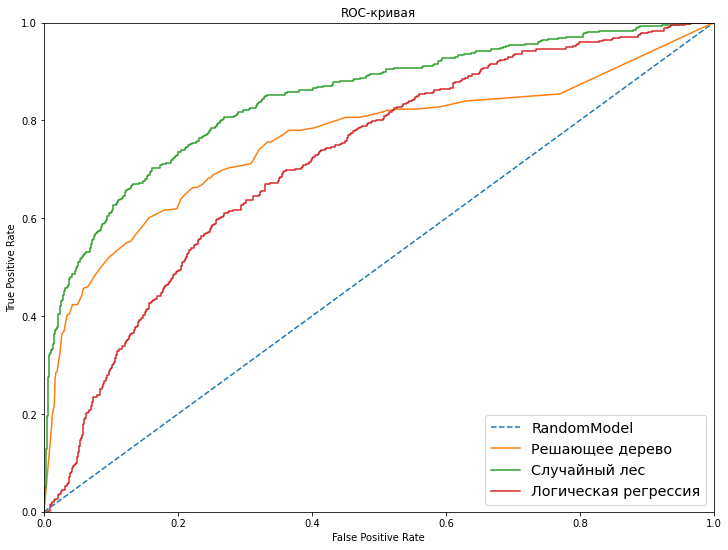

In [34]:
plt.figure(figsize=[12,9])

plt.plot([0, 1], [0, 1], linestyle='--', label='RandomModel')


model = DecisionTreeClassifier(random_state=12345, max_depth=9)
model.fit(features_upsampled, target_upsampled)
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print('AUC-ROC Решаюшего дерева:',auc_roc)
plt.plot(fpr, tpr, label='Решающее дерево')

model = RandomForestClassifier(random_state=12345, n_estimators=41, max_depth=12)
model.fit(features_upsampled, target_upsampled)
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print('AUC-ROC Случайного леса:',auc_roc)
plt.plot(fpr, tpr, label='Случайный лес')

model = LogisticRegression(random_state=20052020, solver='liblinear')
model.fit(features_upsampled, target_upsampled)
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print('AUC-ROC Логической регрессии:',auc_roc)
plt.plot(fpr, tpr, label='Логическая регрессия')



plt.xlim([0,1])
plt.ylim([0,1])

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

plt.legend(loc='lower right', fontsize='x-large')

plt.title("ROC-кривая")
plt.show()

**Вывод:**
1. Лучшей моделью оказался случайный лес, решением - увеличение классов 0 в тренировочной выборке;
2. Выравнивание классов привело к увеличению параметров recall, небольшое понижение precision; 
3. F1-мера для случайного леса превышает 0.59, а метрика AUC-ROC свыше 0.84.


<div class="alert alert-block alert-success">
<b>Успех:</b> Хорошая работа с моделями машинного обучения.  Радует  достатчоное количество расмотренных методов для борьбы с дисбалансом.
</div>


## Тестирование модели

Поскольку лучшие показатели были у **модели случайного леса**, то именно ее и возьмем для тестирования. Изучим гиперпараметры и постараемся улучшить F1-меру:

In [35]:
%%time
best_est = 0
best_f1 = 0
best_model = None

for est in range(1, 500, 100):
    model = RandomForestClassifier(random_state=12345, n_estimators= est)
    model.fit(features_upsampled, target_upsampled)
    predicted_valid = model.predict(features_valid)
    f1 = f1_score(target_valid, predicted_valid)
    
    if f1 > best_f1:
        best_f1 = f1
        best_est = est
print('Лучшее количество деревьев:', best_est,
      '   F1:', best_f1
     )

Лучшее количество деревьев: 401    F1-score: 0.6031746031746033
CPU times: user 11.5 s, sys: 98.4 ms, total: 11.6 s
Wall time: 11.6 s


In [37]:
%%time
best_est = 0
best_f1 = 0
best_model = None

for est in range(350, 400, 5):
    model = RandomForestClassifier(random_state=12345, n_estimators= est)
    model.fit(features_upsampled, target_upsampled)
    predicted_valid = model.predict(features_valid)
    f1 = f1_score(target_valid, predicted_valid)
    
    if f1 > best_f1:
        best_f1 = f1
        best_est = est
print('Лучшее количество деревьев:', best_est,
      '   F1:', best_f1
     )

Лучшее количество деревьев: 355    F1: 0.6031746031746033
CPU times: user 40.9 s, sys: 137 ms, total: 41.1 s
Wall time: 41.1 s


Лучший F1 при n_estimators = 355. Изменим гиперпараметр min_samples_split:

In [42]:
%%time

best_f1 = 0
best_model = None
best_sp = 0
for samples_split in range(2, 11):
    model =  RandomForestClassifier(random_state=12345, n_estimators=355, min_samples_split=samples_split)
    model.fit(features_upsampled, target_upsampled)
    predicted_valid = model.predict(features_valid)
    f1 = f1_score(target_valid, predicted_valid)
    
    if f1 > best_f1:
        best_f1 = f1
        best_sp = samples_split
print('Лучший min_samples_split:', best_sp,
      '   F1:', best_f1
     )

Лучший min_samples_split: 10    F1: 0.6282208588957056
CPU times: user 34.2 s, sys: 112 ms, total: 34.3 s
Wall time: 34.3 s


Также поступим с min_samples_leaf:
    

In [43]:
%%time

best_f1 = 0
best_model = None
best_l = 0
for samples_leaf in range(2, 11):
    model =  RandomForestClassifier(random_state=12345, n_estimators=355, min_samples_split=10, min_samples_leaf= samples_leaf)
    model.fit(features_upsampled, target_upsampled)
    predicted_valid = model.predict(features_valid)
    f1 = f1_score(target_valid, predicted_valid)
    
    if f1 > best_f1:
        best_f1 = f1
        best_l = samples_leaf
print('Лучший min_samples_leaf:', best_l,
      '   F1:', best_f1
     )

Лучший min_samples_leaf: 7    F1: 0.6357615894039735
CPU times: user 33.5 s, sys: 180 ms, total: 33.7 s
Wall time: 33.7 s


Таким образом, лучший показатель F1 при n_estimators = 355, min_samples_leaf= 7,  min_samples_split = 10. С данными гиперпараметрами модели случайный лес проверим на тестовой выборке. Рассмотрим данную модель на дисбалансированных и сбалансированных данных, а также рассмотрим AUC-ROC, построем ROC-кривую: 

In [45]:
model = RandomForestClassifier(random_state=12345, n_estimators=355, min_samples_split=10,
                                   min_samples_leaf=7)
model.fit(features_train, target_train)
predicted_test = model.predict(features_test)
print('Модель при дисбалансе:')
print('Качество:', accuracy_score(target_test, predicted_test))
print('Precision:', precision_score(target_test, predicted_test))
print('Recall:', recall_score(target_test, predicted_test))
print('F1:', f1_score(target_test, predicted_test))
print()

model = RandomForestClassifier(random_state=12345, n_estimators=355, min_samples_split=10,
                                   min_samples_leaf=7, class_weight='balanced')
model.fit(features_train, target_train)
predicted_test = model.predict(features_test)
print('Модель при взвешенных классах:')
print('Качество:', accuracy_score(target_test, predicted_test))
print('Precision:', precision_score(target_test, predicted_test))
print('Recall:', recall_score(target_test, predicted_test))
print('F1:', f1_score(target_test, predicted_test))
print()

model = RandomForestClassifier(random_state=12345, n_estimators=355, min_samples_split=10,
                                   min_samples_leaf=7)
model.fit(features_downsampled, target_downsampled)
predicted_test = model.predict(features_test)
print('Модель при уменьшенном количестве классов 0:')
print('Качество:', accuracy_score(target_test, predicted_test))
print('Precision:', precision_score(target_test, predicted_test))
print('Recall:', recall_score(target_test, predicted_test))
print('F1:', f1_score(target_test, predicted_test))
print()

model = RandomForestClassifier(random_state=12345, n_estimators=355, min_samples_split=10,
                                   min_samples_leaf=7)
model.fit(features_upsampled, target_upsampled)
predicted_test = model.predict(features_test)
print('Модель при увеличенном количестве классов 1:')
print('Качество:', accuracy_score(target_test, predicted_test))
print('Precision:', precision_score(target_test, predicted_test))
print('Recall:', recall_score(target_test, predicted_test))
print('F1:', f1_score(target_test, predicted_test))
print()

Модель при дисбалансе:
Качество: 0.842
Precision: 0.7511737089201878
Recall: 0.37825059101654845
F1: 0.5031446540880503

Модель при взвешенных классах:
Качество: 0.828
Precision: 0.5860566448801743
Recall: 0.6359338061465721
F1: 0.6099773242630384

Модель при уменьшенном количестве классов 0
Качество: 0.778
Precision: 0.4840182648401826
Recall: 0.75177304964539
F1: 0.5888888888888889

Модель при увеличенном количестве классов 1:
Качество: 0.8215
Precision: 0.5679012345679012
Recall: 0.6524822695035462
F1: 0.6072607260726073



AUC-ROC модели случайного леса при дисбалансе: 0.8600388864153891
AUC-ROC модели случайного леса при взвешенных классах: 0.8577572702156142
AUC-ROC модели случайного леса  при уменьшенном количестве классов 0: 0.8500834244030995
AUC-ROC модели случайного леса при увеличенном количестве классов 1: 0.8574634484185342


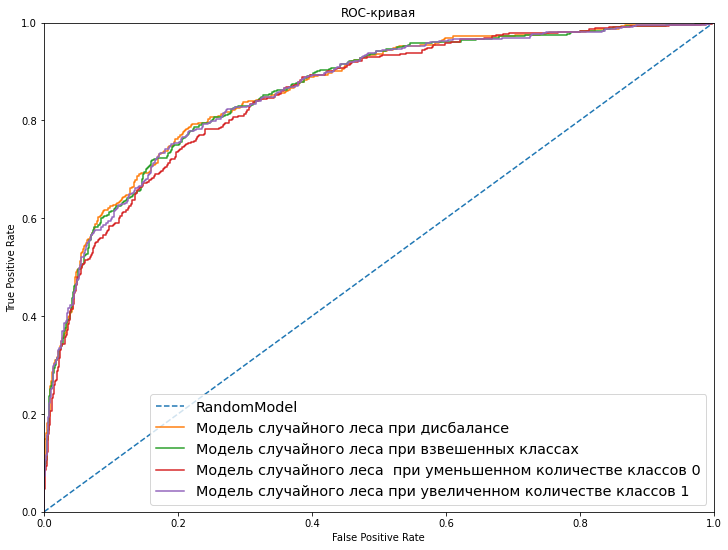

In [47]:
plt.figure(figsize=[12,9])

plt.plot([0, 1], [0, 1], linestyle='--', label='RandomModel')


model = RandomForestClassifier(random_state=12345, n_estimators=355, min_samples_split=10,
                                   min_samples_leaf=7)
model.fit(features_train, target_train)
predicted_test = model.predict(features_test)
probabilities_test = model.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]
fpr, tpr, thresholds = roc_curve(target_test, probabilities_one_test)
auc_roc = roc_auc_score(target_test, probabilities_one_test)
print('AUC-ROC модели случайного леса при дисбалансе:',auc_roc)
plt.plot(fpr, tpr, label='Модель случайного леса при дисбалансе')

model = RandomForestClassifier(random_state=12345, n_estimators=355, min_samples_split=10,
                                   min_samples_leaf=7, class_weight='balanced')
model.fit(features_train, target_train)
predicted_test = model.predict(features_test)
probabilities_test = model.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]
fpr, tpr, thresholds = roc_curve(target_test, probabilities_one_test)
auc_roc = roc_auc_score(target_test, probabilities_one_test)
print('AUC-ROC модели случайного леса при взвешенных классах:',auc_roc)
plt.plot(fpr, tpr, label='Модель случайного леса при взвешенных классах')

model = RandomForestClassifier(random_state=12345, n_estimators=355, min_samples_split=10,
                                   min_samples_leaf=7)
model.fit(features_downsampled, target_downsampled)
predicted_test = model.predict(features_test)
probabilities_test = model.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]
fpr, tpr, thresholds = roc_curve(target_test, probabilities_one_test)
auc_roc = roc_auc_score(target_test, probabilities_one_test)
print('AUC-ROC модели случайного леса  при уменьшенном количестве классов 0:',auc_roc)
plt.plot(fpr, tpr, label='Модель случайного леса  при уменьшенном количестве классов 0')

model = RandomForestClassifier(random_state=12345, n_estimators=355, min_samples_split=10,
                                   min_samples_leaf=7)
model.fit(features_upsampled, target_upsampled)
predicted_test = model.predict(features_test)
probabilities_test = model.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]
fpr, tpr, thresholds = roc_curve(target_test, probabilities_one_test)
auc_roc = roc_auc_score(target_test, probabilities_one_test)
print('AUC-ROC модели случайного леса при увеличенном количестве классов 1:',auc_roc)
plt.plot(fpr, tpr, label='Модель случайного леса при увеличенном количестве классов 1')

plt.xlim([0,1])
plt.ylim([0,1])

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

plt.legend(loc='lower right', fontsize='x-large')

plt.title("ROC-кривая")
plt.show()

**Вывод:**
1. Модель случайного леса при взвешенных классах и модель случайного леса при увеличенном количестве классов 1 превысили показатели f1-меры - около 0.61;
2. Можно заметить, смотря на адекватность модели, AUC-ROC сбалансированных моделей примерно одинаково предсказывают вероятность ухода клиента;
3. Из вышепроведенного исследования можно заключить, что лучшаяя модель по f1-мере и по AUC-ROC - Случайных лес при взвешенных классах.

<div class="alert alert-block alert-success">
<b>Успех:</b>  С тестированием все в порядке! Тебе удалось достичь хороших показателей метрик на тесте. 
</div> 


## Общий вывод:
1. Были изучены и скорректированы данные;
2. Сделана разбивка на три выборки: обучающая, валидация и тестовая;
3. Были рассмотрены три модели классификации (дерево решений, случайный лес и логическая регрессия), изменены гиперпараметры на данных без изменений и на скорректированных;
4. Также изучены балансы классов, изменены гиперпараметры для лучшей модели - Случайный лес;
5. Проведено финальное тестирование. Установлено, что  Случайных лес при взвешенных классах имеет хорошую адекватность при AUC-ROC = 0.858, а также при f1-мере = 0.61, то есть предсказания неслучайны. 